In [1]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

In [2]:
import geometry as geo

In [3]:
geo.SlabSpline?

Init signature: geo.SlabSpline(xs, ys, res=None, name=None, sid=None, bctype='natural')
Docstring:      <no docstring>
File:           ~/repos/github/cianwilson/fenicsx_subduction/python/geometry.py
Type:           type
Subclasses:     


In [4]:
slab = geo.SlabSpline([0.0, 68.2, 154.2, 235, 248, 251, 270, 358, 392], [-6, -15, -35, -70, -80, -82.5, -100, -200, -240], name="Slab")
print(len(slab.points))

9


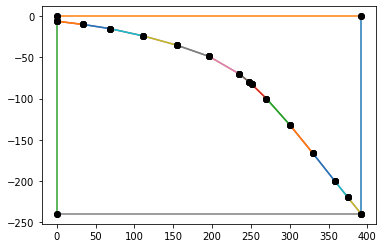

In [5]:
geom = geo.SubductionGeometry(slab)
geom.plot()

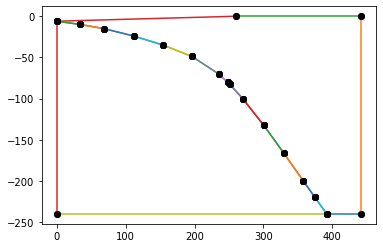

In [6]:
geom.update(coast_distance=260, extra_width=50)
geom.plot()

['WedgeSide', 'UpperCrust']


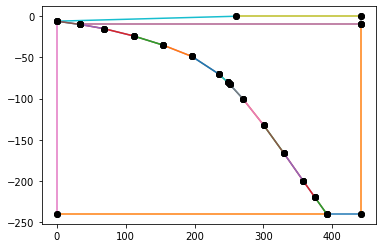

In [7]:
geom.addcrustlayer(10,"UpperCrust")
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
geom.plot()

['WedgeSide', 'LowerCrustBase', 'UpperCrust']
10


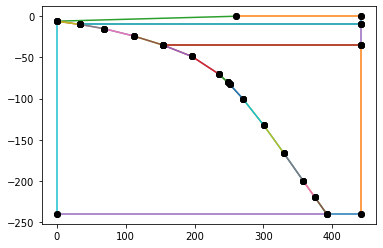

In [8]:
geom.addcrustlayer(-35,"LowerCrustBase")
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
print(len(slab.points))
geom.plot()

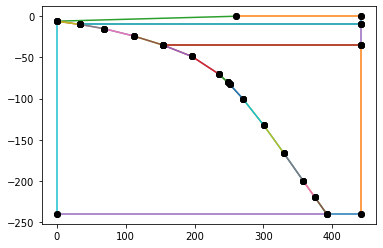

In [9]:
geom.update()
geom.plot()

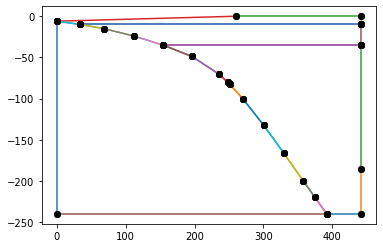

In [10]:
geom.addwedgesidepoint(185, "WedgeSide::InOut", "UpperWedgeSide")
geom.plot()